In [52]:
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [3]:
LABELS=['Normal','Fraud']

In [4]:
dataset=pd.read_csv("creditcard.csv")

print(dataset.columns)
dataset.describe()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print("ANY NULL: ",dataset.isnull().values.any())
print("number of LABELS: ",len(dataset['Class'].unique()))
print("LABELS: ",dataset['Class'].unique())
print("COUNT : ",pd.value_counts(dataset['Class'],sort=True))

ANY NULL:  False
number of LABELS:  2
LABELS:  [0 1]
COUNT :  Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

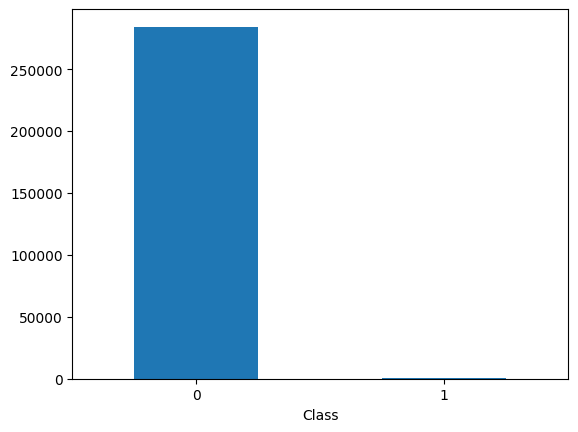

In [6]:
count_class=pd.value_counts(dataset['Class'],sort=True)
count_class.plot(kind='bar',rot=0)

In [7]:
normal_dataset=dataset[dataset['Class']==0]
fraud_dataset=dataset[dataset['Class']==1]

Text(0, 0.5, 'Percentage of transaction')

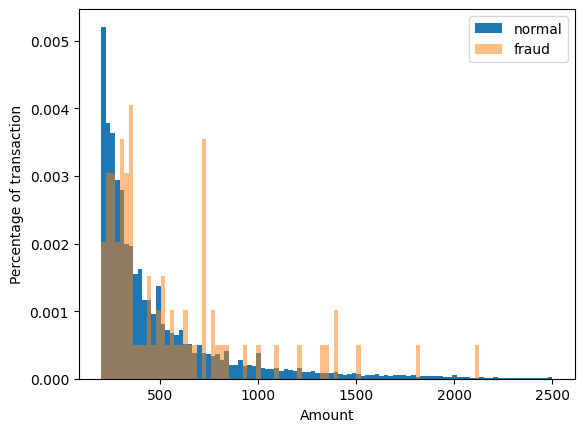

In [8]:
bins=np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount,bins=bins,density=True,alpha=1)
plt.hist(fraud_dataset.Amount,bins=bins,density=True,alpha=0.5)
plt.legend(['normal','fraud'],loc='upper right')
plt.xlabel('Amount')
plt.ylabel('Percentage of transaction')

In [9]:
sc=StandardScaler()

In [10]:
dataset['Amount']=sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Time']=sc.fit_transform(dataset['Time'].values.reshape(-1,1))

In [11]:
raw_data=dataset.values
labels=raw_data[:,-1]
data=raw_data[:,0:-1]

In [12]:
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,test_size=0.2,random_state=2021)

In [13]:
min_val=tf.reduce_min(train_data)
max_val=tf.reduce_max(train_data)

In [14]:
train_data=(train_data-min_val)/(max_val-min_val)
test_data=(test_data-min_val)/(max_val-min_val)

train_data=tf.cast(train_data,tf.float32)
test_data=tf.cast(test_data,tf.float32)

In [15]:
train_labels=train_labels.astype("bool")
test_labels=test_labels.astype("bool")

In [16]:
normal_train_data=train_data[~train_labels]
normal_test_data=test_data[~test_labels]

fraud_train_data=train_data[train_labels]
fraud_test_data=test_data[test_labels]

In [17]:
print("Length of normal train: ",len(normal_train_data))

Length of normal train:  227456


In [18]:
nb_epoch=50
batch_size=64
input_dim=normal_train_data.shape[1]
encoding_dim=14
hidden_dim1=int(encoding_dim/2)
hidden_dim2=4
learning_rate=1e-7

In [64]:
input_layer=tf.keras.layers.Input(shape=(input_dim,))
encoder=tf.keras.layers.Dense(encoding_dim,activation='tanh',activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder=tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
encoder=tf.keras.layers.Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)

decoder=tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder=tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder=tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

autoencoder=tf.keras.Model(inputs=input_layer,outputs=decoder)
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
cp=tf.keras.callbacks.ModelCheckpoint(filepath='autoencoder_fraud.keras',mode='min',monitor='val_loss',verbose=2,save_best_only=True)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,min_delta=0.0001,patience=10,restore_best_weights=True)

In [67]:
autoencoder.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')

In [68]:
history=autoencoder.fit(
    normal_train_data,normal_train_data,
    epochs=nb_epoch,
    validation_data=(test_data,test_data),
    batch_size=batch_size,
    verbose=1,
    callbacks=[cp,early_stopping],
shuffle=True
)

Epoch 1/50
3506/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.0445 - loss: 0.0185
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 955us/step - accuracy: 0.0446 - loss: 0.0183 - val_accuracy: 0.0269 - val_loss: 1.9992e-05
Epoch 2/50
3525/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.0670 - loss: 1.9299e-05
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.keras
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.0669 - loss: 1.9300e-05 - val_accuracy: 0.2170 - val_loss: 1.9924e-05
Epoch 3/50
3544/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.0648 - loss: 1.9245e-05
Epoch 3: val_loss did not improve from 0.00002
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 906us/step - accuracy: 0.0648 - loss: 1.9246e-05 - val_accuracy: 0.2168 - val_loss: 2.0192e-05
Epoch 4/50
3527/3554 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.0616 - loss: 1.9800e-05
Epoch 4: val_loss 

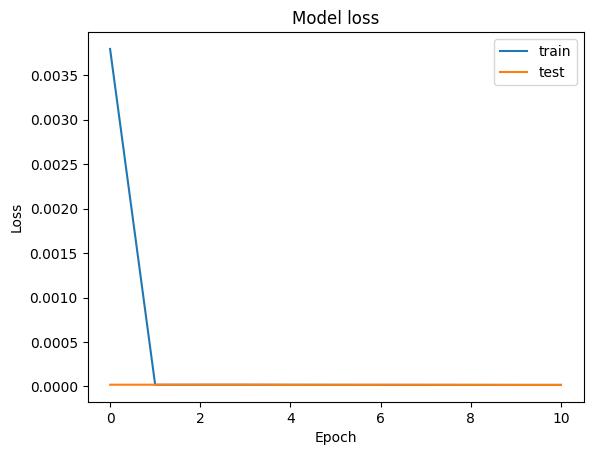

In [69]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [41]:
test_x_predicted=autoencoder.predict(test_data)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [42]:
mse=np.mean(np.power(test_data-test_x_predicted,2),axis=1)

In [44]:
error_df=pd.DataFrame({'Reconstructed_error':mse,'TrueClass':test_labels})

In [45]:
error_df

,Reconstructed_error,TrueClass
0,0.000020,False
1,0.000013,False
2,0.000013,False
3,0.000004,False
4,0.000828,False
...,...,...
56957,0.000004,False
56958,0.000005,False
56959,0.000010,False
56960,0.000008,False


In [46]:
threshold_fixed=0.00014653
pred_y=[1 if e>threshold_fixed else 0 for e in error_df.Reconstructed_error.values]

In [50]:
conf_matrix=confusion_matrix(error_df.TrueClass,pred_y)

ACCURCY :  0.9913275517011341
PRECISION :  0.11439842209072978
RECALL :  0.5631067961165048


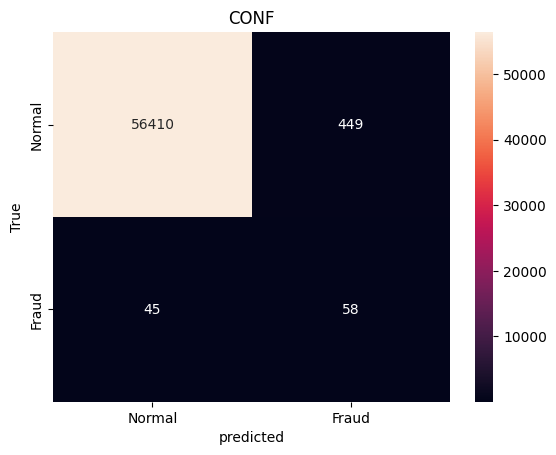

In [62]:
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("CONF")

print("ACCURCY : ",accuracy_score(error_df.TrueClass,pred_y))
print("PRECISION : ",precision_score(error_df.TrueClass,pred_y))
print("RECALL : ",recall_score(error_df.TrueClass,pred_y))